## Problem Statement:

Perform the preliminary steps of EDA and do the necessary pre-processing. Perform market basket analysis on top 3 countries based on number of transactions made.

**Attribute Info:**

- InvoiceNo: (Nominal) Invoice number, a 6-digit integral number uniquely assigned to each transactions. If this code starts with letter 'c', it indicates a cancellation.

- Stock Code: (Nominal) Product Code, a 5-digit integral number uniquely assigned to each distinct product.

- Description: (Nominal) Product Name

- Quantity: (Numeric) Quantities of each product per transaction.

- InvoiceDate: (Numeric) Invoice Date & Time, Date and Time when each transaction was generated.

- UnitPrice: (Numeric) Unit Price, Product price per unit in Sterling.

- CustomerID: (Nominal) Customer number, a 5-digit integral number uniquely assigned to each customer.

- Country: (Nominal) Country name, Name of the country where each customer resides.

## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## EDA & Pre-Processing

In [2]:
# Load the dataset
retail_data = pd.read_excel('/content/Online Retail.xlsx')

# Display top 5 observations of the dataset
retail_data.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Dimensions of the dataset
retail_data.shape

(541909, 8)

- Number of observations = 541909
- Number of variables = 8

In [4]:
# Datatypes 
retail_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [5]:
# Statistical Summary for Numerical Variables
retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- Minimum values of Quantity and Unit Price is negative which is redundant data and needs to be removed from the dataset.

In [6]:
# Statistical Summary for Categorical Variables
retail_data.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


- Top selling item = White Hanging heart T-Light Holder
- Number of Unique invoices = 25900
- Number of Unique items = 4223
- Number of Countries = 38
- Number of distinct product = 4070

In [7]:
# Check for duplicated values
retail_data.duplicated().sum()

5268

In [8]:
# Convert the InvoiceNo column to string
retail_data["InvoiceNo"] = retail_data["InvoiceNo"].astype('str')

# Check for cancelled transactions
retail_data['InvoiceNo'].str.contains('C').sum()

9288

In [9]:
# Treat the negative values present in Unit Price & Quantity
retail_data = retail_data[retail_data['UnitPrice'] > 0]
retail_data = retail_data[retail_data['Quantity'] > 0]

In [10]:
# Drop Cancelled transactions
retail_data = retail_data[~retail_data["InvoiceNo"].str.contains("C")]

In [11]:
# Drop Null values
retail_data = retail_data.dropna(subset = ['Description', 'CustomerID'])

In [12]:
# Drop duplicated values
retail_data.drop_duplicates(inplace=True)

In [13]:
# Check the dimension after cleaning the data
retail_data.shape 

(392692, 8)

In [14]:
plt.style.use('ggplot')

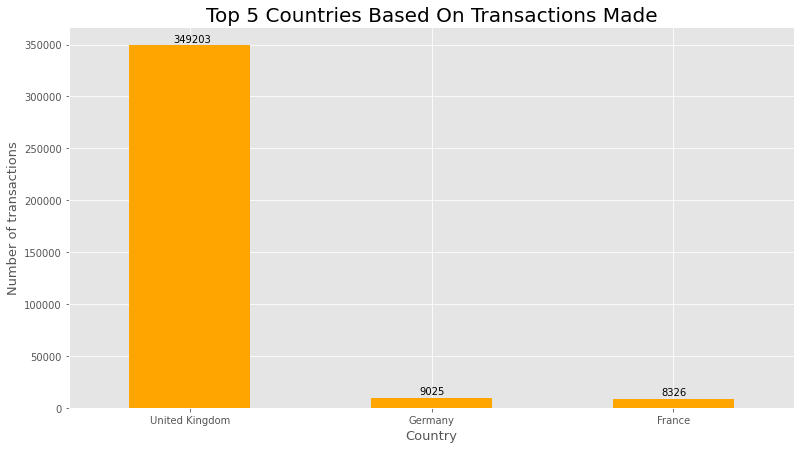

In [15]:
# Top 3 countries based on number of transactions
retail_data['Country'].value_counts().head(3).plot.bar(color=['orange'], figsize=(13,7))
plt.title('Top 5 Countries Based On Transactions Made', fontsize = 20)
plt.ylabel('Number of transactions', fontsize = 13)
plt.xlabel('Country', fontsize = 13)

plt.text(x=-0.07, y=352000, s=retail_data['Country'].value_counts()[0])
plt.text(x=0.95, y=13000,s=retail_data['Country'].value_counts()[1])
plt.text(x=1.95, y=12000,s=retail_data['Country'].value_counts()[2])

plt.xticks(rotation = 0)
plt.show()

In [16]:
# Strip any whitespaces at start and end of Description data values
retail_data['Description'] = retail_data['Description'].str.strip() 

## Market Basket Analysis for Top 3 Countries based on Transactions
## (United Kingdom, Germany, France)

**Create Baskets for UK, Germany, and France**

These baskets will display the quantity of each item purchased in every transaction.

In [17]:
# UK Basket
UK_basket = retail_data[retail_data['Country'] == "United Kingdom"].groupby(['InvoiceNo', 'Description'])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo")
UK_basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Germany Basket
Germany_basket = retail_data[retail_data['Country'] == "Germany"].groupby(['InvoiceNo', 'Description'])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo")
Germany_basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# France Basket
France_basket = retail_data[retail_data['Country'] == "France"].groupby(['InvoiceNo', 'Description'])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo")
France_basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Perform One Hot Encoding for each basket**

All the positive values will be converted to 1 and the negative values and 0 will be converted to 0.

In [20]:
# Create function for encoding (Positive values equals 1, and rest of them as 0)
def encode_values(x):
  if x <= 0:
    return 0
  if x > 0:
    return 1

In [21]:
# Encode UK basket
UK_basket_enc = UK_basket.applymap(encode_values)
UK_basket_enc.head(5)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Check shape of the encoded basket before filtering
UK_basket_enc.shape

(16646, 3833)

In [23]:
# Encode UK basket
Germany_basket_enc = Germany_basket.applymap(encode_values)
Germany_basket_enc.head(5)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Check shape of the encoded basket before filtering
Germany_basket_enc.shape

(457, 1694)

In [25]:
# Encode France basket
France_basket_enc = France_basket.applymap(encode_values)
France_basket_enc.head(5)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Check shape of the encoded basket before filtering
France_basket_enc.shape

(389, 1543)

**Filtering each encoded baskets by removing all invoices that have only one item**

In [27]:
# Filter invoices with 2 or more items for encoded UK basket
UK_basket_filtered = UK_basket_enc[(UK_basket_enc > 0).sum(axis=1) >= 2]
UK_basket_filtered.head(5)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Check shape of the encoded basket after filtering
UK_basket_filtered.shape

(15373, 3833)

In [29]:
# Filter invoices with 2 or more items for encoded Germany basket
Germany_basket_filtered = Germany_basket_enc[(Germany_basket_enc > 0).sum(axis=1) >= 2]
Germany_basket_filtered.head(5)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Check shape of the encoded basket after filtering
Germany_basket_filtered.shape

(433, 1694)

In [31]:
# Filter invoices with 2 or more items for encoded France basket
France_basket_filtered = France_basket_enc[(France_basket_enc > 0).sum(axis=1) >= 2]
France_basket_filtered.head(5)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Check shape of the encoded basket after filtering
France_basket_filtered.shape

(373, 1543)

**Conclusion after filtering each basket:**

- 92.35% of UK_basket data represents two or more transactions.
- 94.74% of Germany_basket data represents two or more transactions.
- 95.88% of Germany_basket data represents two or more transactions.

**Apriori Implementation to generate frequent itemsets for each basket**

In [33]:
UK_freq_itemsets = apriori(UK_basket_filtered, min_support = 0.03, use_colnames = True).sort_values("support", ascending = False)
UK_freq_itemsets.head() 

,support,itemsets
99,0.121382,(WHITE HANGING HEART T-LIGHT HOLDER)
44,0.093215,(JUMBO BAG RED RETROSPOT)
80,0.090483,(REGENCY CAKESTAND 3 TIER)
6,0.084434,(ASSORTED COLOUR BIRD ORNAMENT)
71,0.082938,(PARTY BUNTING)


- White Hanging heart T-Light Holder is the most frequent item bought in UK.
- 12.13% of all transactions made in UK is White Hanging heart T-Light Holder.

In [34]:
Germany_freq_itemsets = apriori(Germany_basket_filtered, min_support = 0.03, use_colnames = True).sort_values("support", ascending = False)
Germany_freq_itemsets.head()

,support,itemsets
86,0.845266,(POSTAGE)
114,0.258661,(ROUND SNACK BOXES SET OF4 WOODLAND)
312,0.237875,"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND)"
112,0.166282,(ROUND SNACK BOXES SET OF 4 FRUITS)
311,0.159353,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)"


- Postage is the most frequent item bought in Germany.
- 84.52% of all transactions made in Germany is Postage.

In [35]:
France_freq_itemsets = apriori(France_basket_filtered, min_support = 0.03, use_colnames = True).sort_values("support", ascending = False)
France_freq_itemsets.head()

,support,itemsets
104,0.790885,(POSTAGE)
105,0.195710,(RABBIT NIGHT LIGHT)
119,0.187668,(RED TOADSTOOL LED NIGHT LIGHT)
99,0.179625,(PLASTERS IN TIN WOODLAND ANIMALS)
94,0.176944,(PLASTERS IN TIN CIRCUS PARADE)


- Postage is the most frequent item bought in France.
- 79.08% of all transactions made in France is Postage.

**Application of association rules to extract useful information about which items are more likely to be purchased together**

In [36]:
# Apply association rule for UK basket
UK_association_rules = association_rules(UK_freq_itemsets, metric = "lift", min_threshold = 1).sort_values("lift", ascending = False).reset_index(drop = True)
UK_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.039810,0.043908,0.030963,0.777778,17.713745,0.029215,4.302413
1,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.043908,0.039810,0.030963,0.705185,17.713745,0.029215,3.256926
2,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.072855,0.055097,0.030638,0.420536,7.632698,0.026624,1.630650
3,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055097,0.072855,0.030638,0.556080,7.632698,0.026624,2.088542
4,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052690,0.093215,0.032915,0.624691,6.701591,0.028003,2.416104
5,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.093215,0.052690,0.032915,0.353105,6.701591,0.028003,1.464396
6,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.072855,0.064659,0.031484,0.432143,6.683433,0.026773,1.647142
7,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.064659,0.072855,0.031484,0.486922,6.683433,0.026773,1.807024


- “Green Regency Teacup and Saucer” and “Roses Regency Teacup and Saucer” have the highest association of any two products. 
- Both items were purchased in 3.09% of all transactions in UK.

In [37]:
# Apply association rule for Germany basket
Germany_association_rules = association_rules(Germany_freq_itemsets, metric = "lift", min_threshold = 1).sort_values("lift", ascending = False).reset_index(drop = True)
Germany_association_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SPACEBOY CHILDRENS CUP),(SPACEBOY CHILDRENS BOWL),0.046189,0.043880,0.039261,0.850000,19.371053,0.037234,6.374134
1,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.043880,0.046189,0.039261,0.894737,19.371053,0.037234,9.061201
2,"(POSTAGE, SPACEBOY CHILDRENS BOWL)",(SPACEBOY CHILDRENS CUP),0.041570,0.046189,0.036952,0.888889,19.244444,0.035031,8.584296
3,(SPACEBOY CHILDRENS CUP),"(POSTAGE, SPACEBOY CHILDRENS BOWL)",0.046189,0.041570,0.036952,0.800000,19.244444,0.035031,4.792148
4,"(SPACEBOY CHILDRENS CUP, POSTAGE)",(SPACEBOY CHILDRENS BOWL),0.043880,0.043880,0.036952,0.842105,19.191136,0.035026,6.055427
5,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, POSTAGE)",0.043880,0.043880,0.036952,0.842105,19.191136,0.035026,6.055427
6,"(POSTAGE, WHITE SPOT RED CERAMIC DRAWER KNOB)",(WHITE SPOT BLUE CERAMIC DRAWER KNOB),0.046189,0.036952,0.030023,0.650000,17.590625,0.028316,2.751567
7,(WHITE SPOT BLUE CERAMIC DRAWER KNOB),"(POSTAGE, WHITE SPOT RED CERAMIC DRAWER KNOB)",0.036952,0.046189,0.030023,0.812500,17.590625,0.028316,5.086990
8,"(POSTAGE, CHILDRENS CUTLERY DOLLY GIRL)",(CHILDRENS CUTLERY SPACEBOY),0.048499,0.050808,0.039261,0.809524,15.932900,0.036797,4.983256
9,(CHILDRENS CUTLERY SPACEBOY),"(POSTAGE, CHILDRENS CUTLERY DOLLY GIRL)",0.050808,0.048499,0.039261,0.772727,15.932900,0.036797,4.186605


- “Spaceboy Childrens Cup” and “Spaceboy Childrens Bowl” have the highest association of any two products. 
- Both items were purchased in 3.92% of all transactions in Germany.

In [38]:
# Apply association rule for France basket
France_association_rules = association_rules(France_freq_itemsets, metric = "lift", min_threshold = 1).sort_values("lift", ascending = False).reset_index(drop = True)
France_association_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...","(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL ...",0.037534,0.034853,0.032172,0.857143,24.593407,0.030863,6.756032
1,"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL ...","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...",0.034853,0.037534,0.032172,0.923077,24.593407,0.030863,12.512064
2,"(PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY ...","(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL ...",0.032172,0.042895,0.032172,1.000000,23.312500,0.030792,inf
3,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKUL...","(PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY ...",0.042895,0.032172,0.032172,0.750000,23.312500,0.030792,3.871314
4,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKUL...","(SET/6 RED SPOTTY PAPER CUPS, PACK OF 20 SKULL...",0.042895,0.032172,0.032172,0.750000,23.312500,0.030792,3.871314
5,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...","(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL ...",0.037534,0.042895,0.037534,1.000000,23.312500,0.035923,inf
6,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES, PACK ...","(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL ...",0.034853,0.042895,0.034853,1.000000,23.312500,0.033358,inf
7,"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL ...","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...",0.042895,0.037534,0.037534,0.875000,23.312500,0.035923,7.699732
8,"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL ...","(POSTAGE, SET/6 RED SPOTTY PAPER PLATES, PACK ...",0.042895,0.034853,0.034853,0.812500,23.312500,0.033358,5.147453
9,"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL ...","(PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY ...",0.042895,0.032172,0.032172,0.750000,23.312500,0.030792,3.871314


- “SET/20 RED RETROSPOT PAPER NAPKINS', 'SET/6 RED SPOTTY PAPER CUPS', 'PACK OF 6 SKULL PAPER PLATES” and “PACK OF 20 SKULL PAPER NAPKINS', 'SET/6 RED SPOTTY PAPER PLATES” have the highest association of any two products. 
- Both items were purchased in 3.21% of all transactions in France.

**Conclusion:**

For each antecedent product there should be recommendation for the consequent product , which in turn will lead to the sale of the other product(consequent).

Bundling the associated products and implement a bundle pricing technique or a sales promotion around both items.

These business insights vary from region to region.